## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain and has decided to come up with a business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

In [1]:
#Let us supress warnings

import warnings
warnings.filterwarnings('ignore')

#Let us import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#Importing the Excel file and saving it as "bike" dataset

bike = pd.read_csv("day.csv")
bike

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windsp

### Data Quality check

In [6]:
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

Observations: 
- No null values in the dataset
- Dataset has 730 rows and  columns

## Data Preparation

In [7]:
#Checking the columns in the dataset

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#Dropping unwanted columns that can affect the model after checking the data dictionary

bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

#We dropped 'instant','dteday','casual','registered' from the data frame

In [9]:
#Checking the shape of the data set after dropping the columns

bike_new.shape

(730, 12)

In [10]:
#Checking correlation of the variables
bike_new.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -2.248195e-17  8.310321e-01 -0.010868  0.004012   
yr         -2.248195e-17  1.000000e+00 -2.470170e-17  0.008195  0.000685   
mnth        8.310321e-01 -2.470170e-17  1.000000e+00  0.018905 -0.004059   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.020145   
weekday     4.012478e-03  6.852851e-04 -4.059002e-03 -0.020145  1.000000   
workingday  1.786841e-02 -1.185197e-02 -1.041372e-02 -0.257009  0.001588   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.034216   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764  0.044876   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703  0.037964   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662  0.008780   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257 -0.017230   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.036183   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.017868    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.011852   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.010414    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.257009   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.001588    0.034216  0.044876  0.037964  0.008780  -0.017230   
workingday    1.000000   -0.026332  0.002044  0.010657  0.053770  -0.002453   
weathersit   -0.026332    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.002044   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.010657   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.053770    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.002453    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt          -0.027640   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
yr          0.569728  
mnth        0.278191  
holiday    -0.068764  
weekday     0.036183  
workingday -0.027640  
weathersit -0.295929  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
cnt         1.000000

### Creating dummy variables

In [11]:
#### Encoding: Let's convert the categorical values into continous variables so first let us 
#convert to Category data type

season_dict = {1:"spring", 2:"summer",3:"fall",4:"winter"}

yr_dict = {0: "2018" , 1 : "2019" }

mnth_dict = {1:"january", 2: "february", 3: "march" , 4: "april" , 5: "may" , 6:"june", 7:"july", 8:"august", 9:"september",
             10: "october", 11:"november" , 12: "december" }

weekday_dict = {0:"sunday" , 1: "monday", 2:"tuesday" ,  3:"wednesday" , 4:"thursday" ,5:"friday" , 6:"saturday" }

weathersit_dict = {1:"clear" , 2:"mist" , 3: "snow"}

In [12]:
#Replacing the values
mapping = {"season":season_dict,"yr":yr_dict,"mnth" : mnth_dict, "weekday" : weekday_dict, "weathersit" : weathersit_dict }

for col in mapping :
    
    bike_new[col].replace(mapping[col],inplace=True)

In [13]:
bike_new= pd.get_dummies(bike_new, drop_first=True) #Dropping the first variable for each set of dummy variable to reduce redundancy

In [14]:
#New dataframe after creation of dummies
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            730 non-null    int64  
 1   workingday         730 non-null    int64  
 2   temp               730 non-null    float64
 3   atemp              730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   season_spring      730 non-null    uint8  
 8   season_summer      730 non-null    uint8  
 9   season_winter      730 non-null    uint8  
 10  yr_2019            730 non-null    uint8  
 11  mnth_august        730 non-null    uint8  
 12  mnth_december      730 non-null    uint8  
 13  mnth_february      730 non-null    uint8  
 14  mnth_january       730 non-null    uint8  
 15  mnth_july          730 non-null    uint8  
 16  mnth_june          730 non

In [15]:
#Checking the shape of the new dataframe
bike_new.shape

(730, 30)

### Splitting the Data

In [16]:
np.random.seed(0)

df_train, df_test =train_test_split(bike_new,train_size=0.7,test_size=0.3,random_state=100) 
#Specifying random state so that the test and train data have same rows

#### Checking the shape and info of the test and train datasets

In [17]:
df_train.head()

holiday  workingday       temp    atemp      hum  windspeed   cnt  \
653        0           1  19.201653  23.0423  55.8333  12.208807  7534   
576        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728        0           1  10.489153  11.5850  48.3333  23.500518  1796   
482        0           0  15.443347  18.8752  48.9583   8.708325  4220   

     season_spring  season_summer  season_winter  ...  mnth_october  \
653              0              0              1  ...             1   
576              0              0              0  ...             0   
426              1              0              0  ...             0   
728              1              0              0  ...             0   
482              0              1              0  ...             0   

     mnth_september  weekday_monday  weekday_saturday  weekday_sunday  \
653               0               0                 0               0   
576               0               0                 0               0   
426               0               0                 0               1   
728               0               1                 0               0   
482               0               0                 0               1   

     weekday_thursday  weekday_tuesday  weekday_wednesday  weathersit_mist  \
653                 0                0                  1                0   
576                 0                0                  1                0   
426                 0                0                  0                1   
728                 0                0                  0                0   
482                 0                0                  0                1   

     weathersit_snow  
653                0  
576                0  
426                0  
728                0  
482                0  

[5 rows x 30 columns]

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            510 non-null    int64  
 1   workingday         510 non-null    int64  
 2   temp               510 non-null    float64
 3   atemp              510 non-null    float64
 4   hum                510 non-null    float64
 5   windspeed          510 non-null    float64
 6   cnt                510 non-null    int64  
 7   season_spring      510 non-null    uint8  
 8   season_summer      510 non-null    uint8  
 9   season_winter      510 non-null    uint8  
 10  yr_2019            510 non-null    uint8  
 11  mnth_august        510 non-null    uint8  
 12  mnth_december      510 non-null    uint8  
 13  mnth_february      510 non-null    uint8  
 14  mnth_january       510 non-null    uint8  
 15  mnth_july          510 non-null    uint8  
 16  mnth_june          510 no

In [19]:
df_train.shape

(510, 30)

In [20]:
df_test.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299        0           0  19.270000  22.85230  81.2917  13.250121  2659   
221        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152        0           0  29.315000  32.19710  30.5000  19.583229  4968   

     season_spring  season_summer  season_winter  ...  mnth_october  \
184              0              0              0  ...             0   
535              0              1              0  ...             0   
299              0              0              1  ...             1   
221              0              0              0  ...             0   
152              0              1              0  ...             0   

     mnth_september  weekday_monday  weekday_saturday  weekday_sunday  \
184               0               0                 0               0   
535               0               0                 0               0   
299               0               0                 1               0   
221               0               0                 0               0   
152               0               0                 1               0   

     weekday_thursday  weekday_tuesday  weekday_wednesday  weathersit_mist  \
184                 0                0                  1                1   
535                 1                0                  0                0   
299                 0                0                  0                1   
221                 0                0                  0                0   
152                 0                0                  0                0   

     weathersit_snow  
184                0  
535                0  
299                0  
221                0  
152                0  

[5 rows x 30 columns]

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            219 non-null    int64  
 1   workingday         219 non-null    int64  
 2   temp               219 non-null    float64
 3   atemp              219 non-null    float64
 4   hum                219 non-null    float64
 5   windspeed          219 non-null    float64
 6   cnt                219 non-null    int64  
 7   season_spring      219 non-null    uint8  
 8   season_summer      219 non-null    uint8  
 9   season_winter      219 non-null    uint8  
 10  yr_2019            219 non-null    uint8  
 11  mnth_august        219 non-null    uint8  
 12  mnth_december      219 non-null    uint8  
 13  mnth_february      219 non-null    uint8  
 14  mnth_january       219 non-null    uint8  
 15  mnth_july          219 non-null    uint8  
 16  mnth_june          219 no

In [22]:
df_test.shape

(219, 30)

## Let us perform EDA

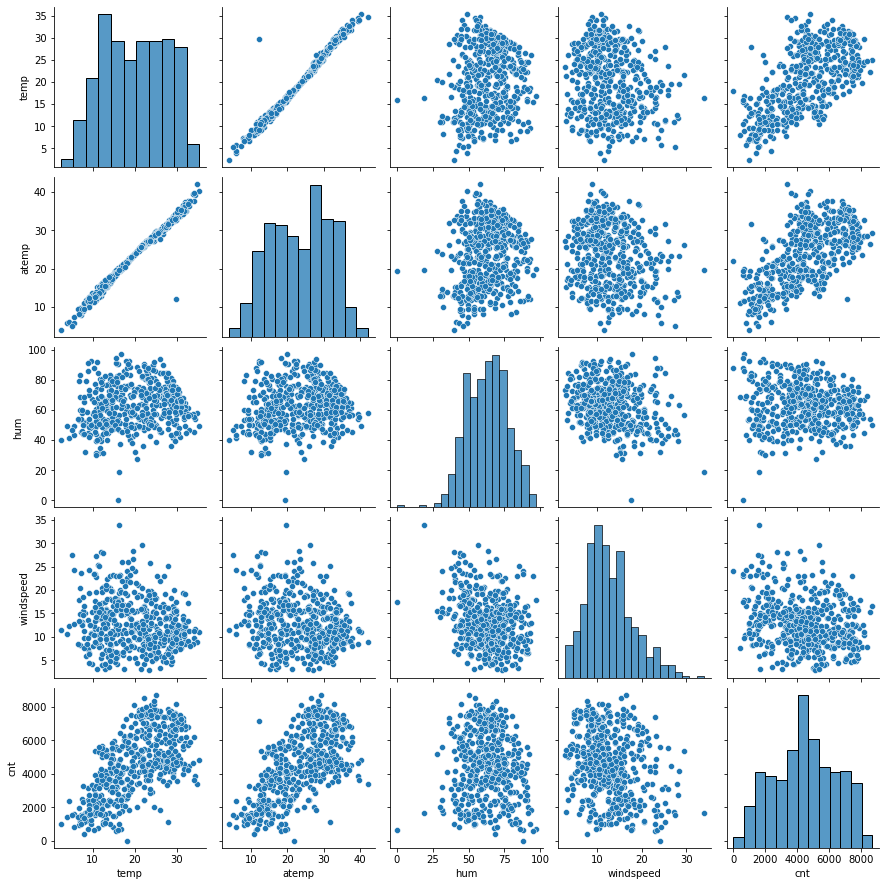

In [23]:
# Creating a dataframe of only numeric variables and checking

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='auto')
plt.show()

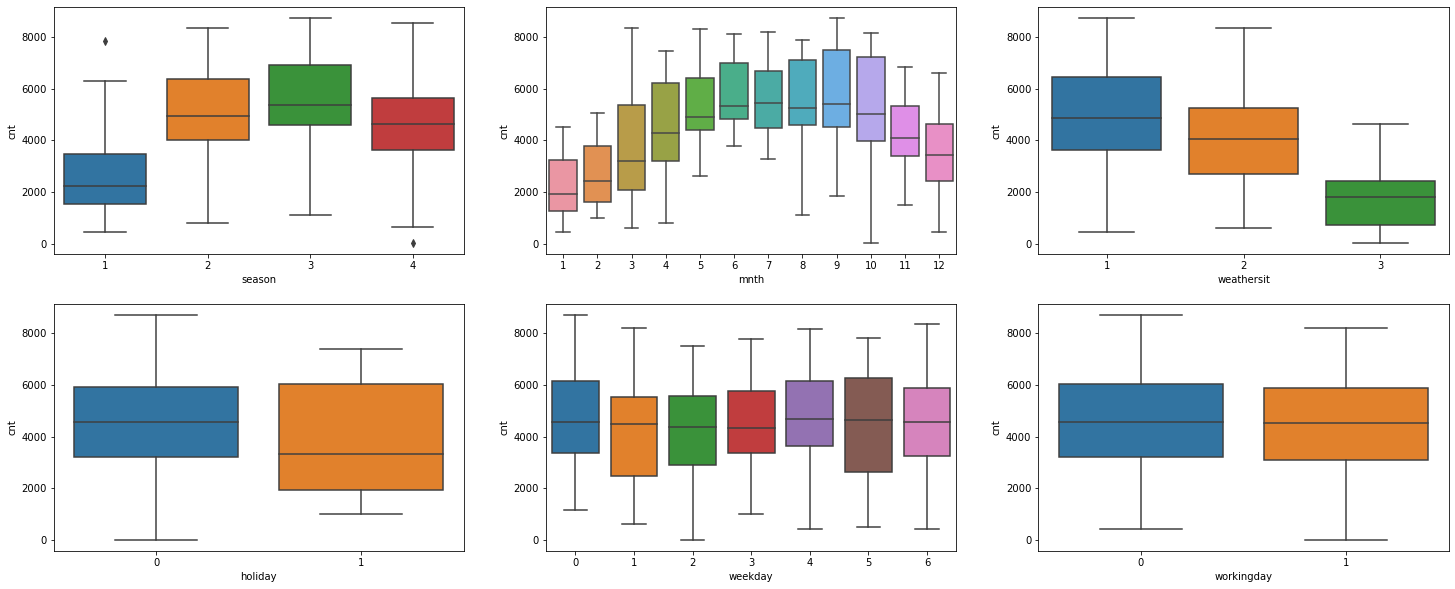

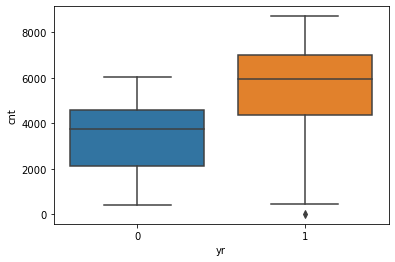

In [67]:
#Visualizing categorical variables from the original dataset

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

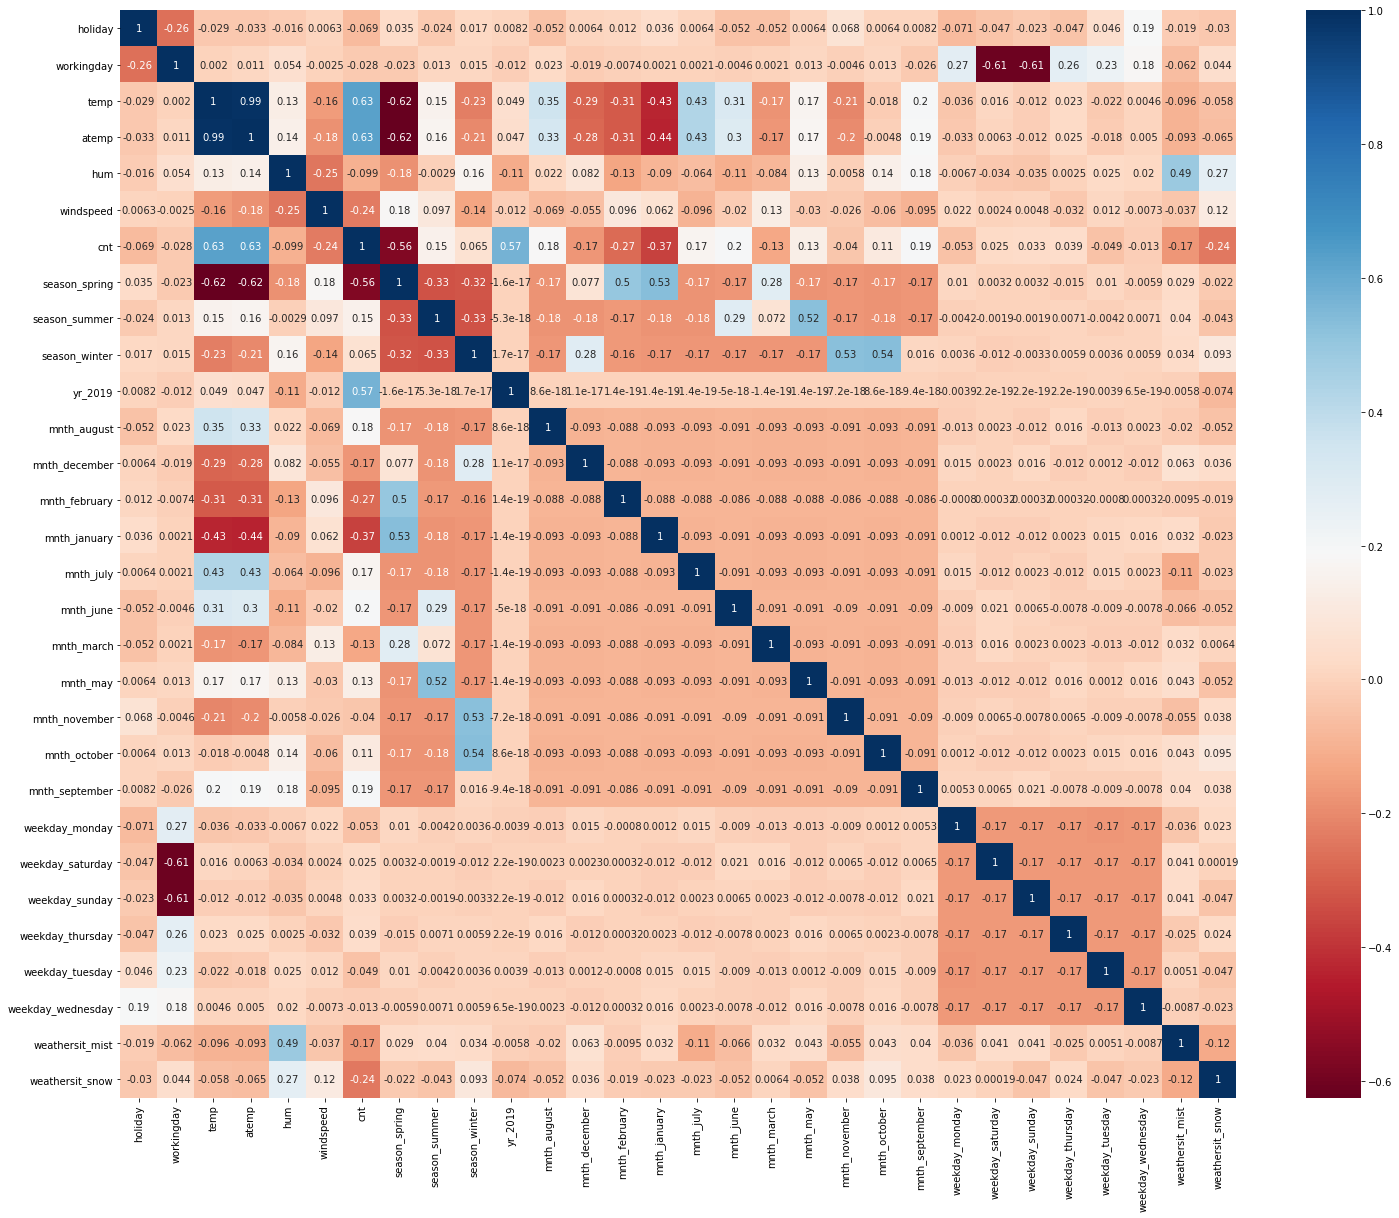

In [25]:
#Checking correlation among the variables

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

## Scaling 

In [26]:
scaler = MinMaxScaler()
#Scaling numerical values

cols = ['temp', 'atemp', 'hum', 'windspeed']

df_train[cols] = scaler.fit_transform(df_train[cols])

In [27]:
#Checking the dataset after scaling

df_train.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.711765    0.537262    0.512989    0.650369    0.320768   
std      0.157763    0.453386    0.225844    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.540519    0.526811    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               cnt  season_spring  season_summer  season_winter  ...  \
count   510.000000     510.000000     510.000000      510.00000  ...   
mean   4486.382353       0.243137       0.245098        0.24902  ...   
std    1952.158739       0.429398       0.430568        0.43287  ...   
min      22.000000       0.000000       0.000000        0.00000  ...   
25%    3120.000000       0.000000       0.000000        0.00000  ...   
50%    4530.000000       0.000000       0.000000        0.00000  ...   
75%    5973.500000       0.000000       0.000000        0.00000  ...   
max    8714.000000       1.000000       1.000000        1.00000  ...   

       mnth_october  mnth_september  weekday_monday  weekday_saturday  \
count    510.000000      510.000000      510.000000        510.000000   
mean       0.086275        0.080392        0.154902          0.129412   
std        0.281045        0.272166        0.362166          0.335985   
min        0.000000        0.000000        0.000000          0.000000   
25%        0.000000        0.000000        0.000000          0.000000   
50%        0.000000        0.000000        0.000000          0.000000   
75%        0.000000        0.000000        0.000000          0.000000   
max        1.000000        1.000000        1.000000          1.000000   

       weekday_sunday  weekday_thursday  weekday_tuesday  weekday_wednesday  \
count      510.000000        510.000000       510.000000         510.000000   
mean         0.137255          0.143137         0.152941           0.135294   
std          0.344454          0.350557         0.360284           0.342373   
min          0.000000          0.000000         0.000000           0.000000   
25%          0.000000          0.000000         0.000000           0.000000   
50%          0.000000          0.000000         0.000000           0.000000   
75%          0.000000          0.000000         0.000000           0.000000   
max          1.000000          1.000000         1.000000           1.000000   

       weathersit_mist  weathersit_snow  
count       510.000000       510.000000  
mean          0.343137         0.029412  
std           0.475223         0.169124  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           0.000000         0.000000  
75%           1.000000         0.000000  
max           1.000000         1.000000  

[8 rows x 30 columns]

## Model Building

In [28]:
# Dividing X & Y for model building

y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
#Using RFE to extract 15 variables, so output will be 15 variables
lm = LinearRegression()
lm.fit(X_train,y_train)

#running RFE
rfe = RFE(lm,15) 
rfe = rfe.fit(X_train,y_train)

In [30]:
(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_august', False, 10),
 ('mnth_december', True, 1),
 ('mnth_february', False, 2),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_march', False, 15),
 ('mnth_may', False, 7),
 ('mnth_november', True, 1),
 ('mnth_october', False, 12),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 9),
 ('weekday_saturday', False, 4),
 ('weekday_sunday', False, 5),
 ('weekday_thursday', False, 13),
 ('weekday_tuesday', False, 8),
 ('weekday_wednesday', False, 11),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [31]:
#Checking Columns(variables) selected by RFE

selected_var = X_train.columns[rfe.support_]

selected_var

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weathersit_mist',
       'weathersit_snow'],
      dtype='object')

In [32]:
#Checking Columns(variables) dropped by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_august', 'mnth_february', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_october', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

### Building Model

In [33]:
X_train_rfe = X_train[selected_var]


In [34]:
#Using statsmodel.api
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() #fitting regression model

In [35]:
print(lm.summary()) #ModelSummary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          3.34e-189
Time:                        13:46:51   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2805.5562    313.247     

In [36]:
def vif(X) :
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return (vif)

In [37]:
vif(X_train_rfe)

features    VIF
0             const  82.48
5     season_spring   5.27
2              temp   4.42
7     season_winter   3.83
6     season_summer   2.76
3               hum   1.93
12    mnth_november   1.76
10     mnth_january   1.68
14  weathersit_mist   1.57
9     mnth_december   1.49
11        mnth_july   1.49
13   mnth_september   1.34
15  weathersit_snow   1.26
4         windspeed   1.21
8           yr_2019   1.04
1           holiday   1.03

In [39]:
#Dropping season_spring because VIF>5
X_train_new = X_train_rfe.drop(['season_spring'],axis =1) 

In [41]:
#Function to find model summary

def model_summary(X) :
    
    lm = sm.OLS(y_train,X).fit()
    
    print(lm.summary())

In [42]:
#Summary after dropping season_spring
model_summary(X_train_new)
vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          1.54e-188
Time:                        13:47:54   Log-Likelihood:                -4115.4
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2249.6749    249.969     

features    VIF
0             const  51.75
2              temp   2.32
6     season_winter   2.08
3               hum   1.90
11    mnth_november   1.70
9      mnth_january   1.67
13  weathersit_mist   1.55
8     mnth_december   1.47
5     season_summer   1.44
10        mnth_july   1.43
14  weathersit_snow   1.25
12   mnth_september   1.21
4         windspeed   1.20
1           holiday   1.03
7           yr_2019   1.03

In [43]:
#Dropping mnth_december as p value is greater than 0.05
X_train_new = X_train_new.drop(['mnth_december'],axis =1)

#summary after dropping mnth_december

model_summary(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          5.15e-189
Time:                        13:48:56   Log-Likelihood:                -4117.0
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2163.5725    245.817     

In [44]:
#Dropping mnth_november as p value is greater than 0.05
X_train_new = X_train_new.drop(['mnth_november'],axis =1)

#summary after dropping mnth_november

model_summary(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          6.03e-190
Time:                        13:49:18   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2145.9539    245.307     

In [45]:
vif(X_train_new)

features    VIF
0             const  49.60
2              temp   2.06
3               hum   1.88
8      mnth_january   1.55
11  weathersit_mist   1.55
6     season_winter   1.53
9         mnth_july   1.43
5     season_summer   1.41
12  weathersit_snow   1.24
4         windspeed   1.19
10   mnth_september   1.19
7           yr_2019   1.03
1           holiday   1.02

In [46]:
#Dropping mnth_january  as it has the highest p value 
X_train_new = X_train_new.drop(['mnth_january'],axis =1)

#summary after dropping mnth_january 

model_summary(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          3.89e-190
Time:                        13:49:57   Log-Likelihood:                -4120.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     498   BIC:                             8315.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1984.0721    234.480     

In [47]:
vif(X_train_new)

features    VIF
0             const  44.99
3               hum   1.87
2              temp   1.60
10  weathersit_mist   1.55
8         mnth_july   1.43
5     season_summer   1.33
6     season_winter   1.29
11  weathersit_snow   1.24
9    mnth_september   1.19
4         windspeed   1.18
7           yr_2019   1.03
1           holiday   1.02

In [48]:
#Dropping mnth_july as it has the highest p value 
X_train_new = X_train_new.drop(['mnth_july'],axis =1)

#summary after dropping mnth_july

model_summary(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          7.80e-190
Time:                        13:50:21   Log-Likelihood:                -4123.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     499   BIC:                             8316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1983.3145    235.900     

In [49]:
vif(X_train_new)

features    VIF
0             const  44.99
3               hum   1.86
9   weathersit_mist   1.55
2              temp   1.27
6     season_winter   1.25
10  weathersit_snow   1.23
5     season_summer   1.19
4         windspeed   1.18
8    mnth_september   1.11
7           yr_2019   1.03
1           holiday   1.02

From the above models we are left with 11 variables and we have got the R squared value as 0.838

In [50]:
#updating the lm value with latest set of variables after model building

lm = sm.OLS(y_train,X_train_new).fit()

### Residual Analysis

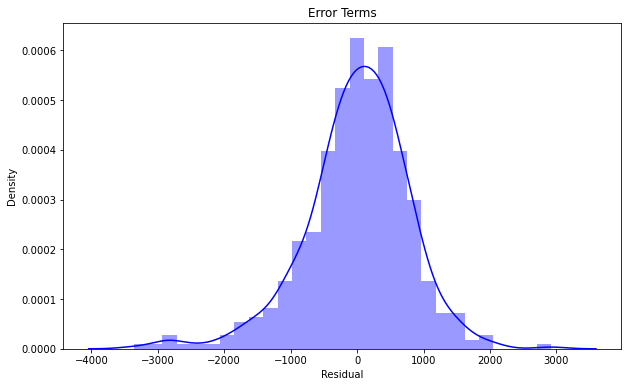

In [51]:
y_train_pred = lm.predict(X_train_new)

res =  y_train - y_train_pred #Calculating the residual value

# Distribution plot of error terms

plt.figure(figsize=(10,6))
plt.title("Error Terms")
plt.xlabel("Residual")
sns.distplot(res,color='b')
plt.show()

Observation:
   - We see a normal distribution

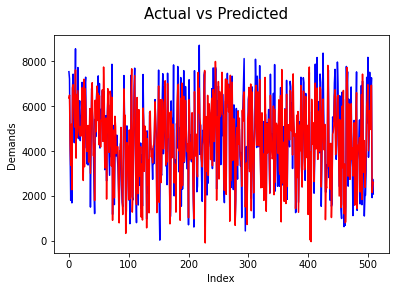

In [52]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

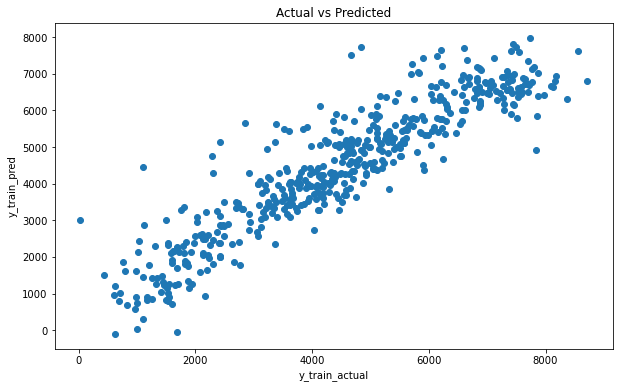

In [53]:
#Preparing a scatter plot (y_train and Y_pred)for the above inference between Actual and Predicted

plt.figure(figsize=(10,6))
plt.title("Actual vs Predicted")
plt.xlabel("y_train_actual")
plt.ylabel("y_train_pred")
plt.scatter(y_train,y_train_pred)
plt.show()

Observation: 
 - We see that variance of error terms is constant.

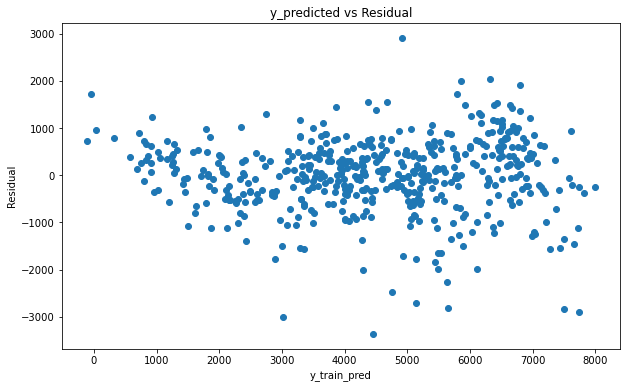

In [54]:
#Plotting Y_predicted vs Residual
plt.figure(figsize=(10,6))
plt.title("y_predicted vs Residual")
plt.xlabel("y_train_pred")
plt.ylabel("Residual")
plt.scatter(y_train_pred,res)
plt.show()

Observations:
 - We can see a non uniform distribution of the residuals and we don't see any extreme values

### Let's start making predictions

In [55]:
#Scaling variables for Test dataset 

cols = ['temp', 'atemp', 'hum', 'windspeed']
df_test[cols] = scaler.transform(df_test[cols])

In [56]:
#Checking dataset after scaling
df_test.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.036530    0.639269    0.558941    0.532991    0.638508    0.313350   
std      0.188034    0.481313    0.233698    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.354650    0.344751    0.527265    0.198517   
50%      0.000000    1.000000    0.558691    0.549198    0.627737    0.299459   
75%      0.000000    1.000000    0.759096    0.714132    0.743928    0.403048   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

               cnt  season_spring  season_summer  season_winter  ...  \
count   219.000000     219.000000     219.000000     219.000000  ...   
mean   4546.981735       0.255708       0.264840       0.232877  ...   
std    1898.633630       0.437258       0.442259       0.423633  ...   
min     441.000000       0.000000       0.000000       0.000000  ...   
25%    3303.500000       0.000000       0.000000       0.000000  ...   
50%    4579.000000       0.000000       0.000000       0.000000  ...   
75%    5869.500000       1.000000       1.000000       0.000000  ...   
max    8395.000000       1.000000       1.000000       1.000000  ...   

       mnth_october  mnth_september  weekday_monday  weekday_saturday  \
count    219.000000      219.000000      219.000000        219.000000   
mean       0.082192        0.086758        0.118721          0.173516   
std        0.275286        0.282125        0.324202          0.379560   
min        0.000000        0.000000        0.000000          0.000000   
25%        0.000000        0.000000        0.000000          0.000000   
50%        0.000000        0.000000        0.000000          0.000000   
75%        0.000000        0.000000        0.000000          0.000000   
max        1.000000        1.000000        1.000000          1.000000   

       weekday_sunday  weekday_thursday  weekday_tuesday  weekday_wednesday  \
count      219.000000        219.000000       219.000000         219.000000   
mean         0.155251          0.141553         0.123288           0.155251   
std          0.362974          0.349389         0.329520           0.362974   
min          0.000000          0.000000         0.000000           0.000000   
25%          0.000000          0.000000         0.000000           0.000000   
50%          0.000000          0.000000         0.000000           0.000000   
75%          0.000000          0.000000         0.000000           0.000000   
max          1.000000          1.000000         1.000000           1.000000   

       weathersit_mist  weathersit_snow  
count       219.000000       219.000000  
mean          0.319635         0.027397  
std           0.467403         0.163612  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           0.000000         0.000000  
75%           1.000000         0.000000  
max           1.000000         1.000000  

[8 rows x 30 columns]

In [57]:
#Dividing the test dataset now
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_test_new = sm.add_constant(X_test) #Assigning a constant

X_test_new = X_test_new[X_train_new.columns]

X_test_new.head()

const  holiday      temp       hum  windspeed  season_summer  \
184    1.0        1  0.831783  0.657364   0.084219              0   
535    1.0        0  0.901354  0.610133   0.153728              1   
299    1.0        0  0.511964  0.837699   0.334206              0   
221    1.0        0  0.881625  0.437098   0.339570              0   
152    1.0        0  0.817246  0.314298   0.537414              1   

     season_winter  yr_2019  mnth_september  weathersit_mist  weathersit_snow  
184              0        0               0                1                0  
535              0        1               0                0                0  
299              1        0               0                1                0  
221              0        0               0                0                0  
152              0        0               0                0                0

#### Let's make predictions on the test dataset now

In [59]:
y_pred = lm.predict(X_test_new)

In [60]:
r2_score(y_test, y_pred) #Calculating R squared value

0.8046410496371389

In [61]:
# computing adjusted R-squared score

r2 = r2_score(y_test, y_pred)

n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) #Formula to calculate Adjusted R^2

adjusted_r2

0.7942596561395956

Formula for Adjusted R^2

<b> R2adj.=1−(1−R2)∗n−1n−p−1 </b>

Observation: We see a R^2 squared value of 0.794 on the test dataset

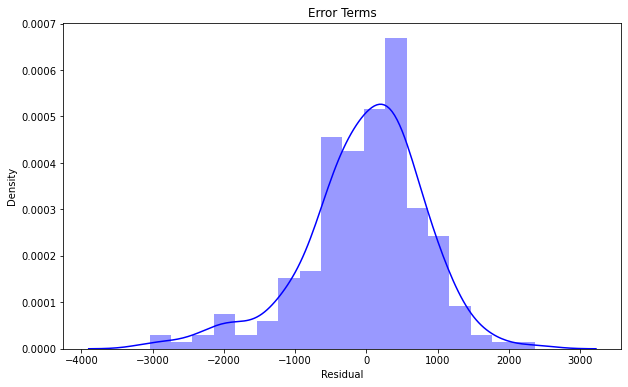

In [62]:
#Checking distribution of Error terms
res_test = res_test =  y_test - y_pred

# Distribution plot of error terms

plt.figure(figsize=(10,6))
plt.title("Error Terms")
plt.xlabel("Residual")
sns.distplot(res_test,color='b')
plt.show()


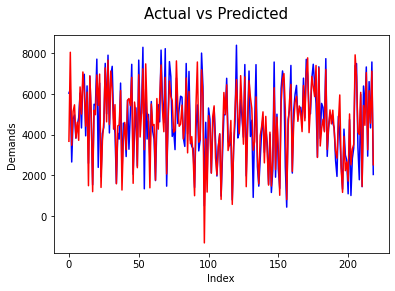

In [63]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

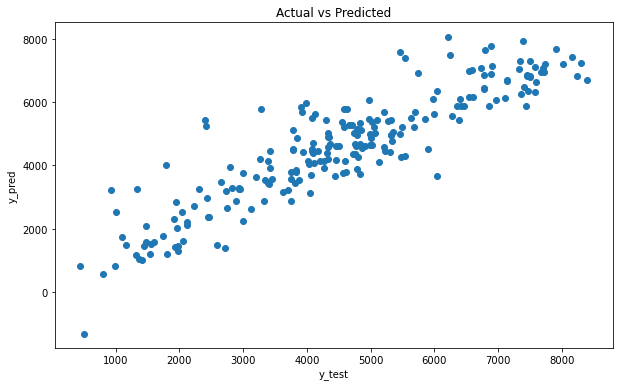

In [64]:
#Preparing a scatter plot (y_train and Y_pred)for the above inference between Actual and Predicted

plt.figure(figsize=(10,6))
plt.title("Actual vs Predicted")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test,y_pred)
plt.show()

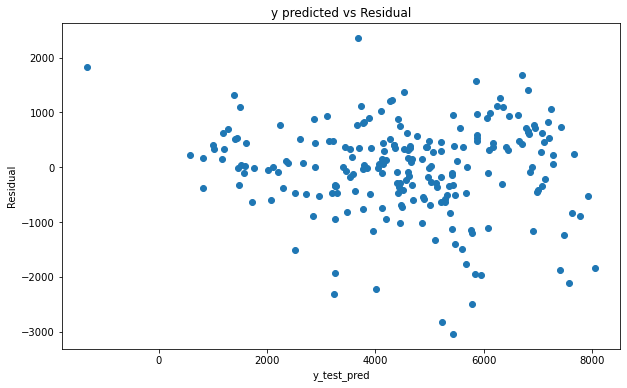

In [65]:
#plotting y_test_pred vs Residual

plt.figure(figsize=(10,6))
plt.title("y predicted vs Residual")
plt.xlabel("y_test_pred")
plt.ylabel("Residual")
plt.scatter(y_pred,res_test)
plt.show()

Observation: We see that the above 4 graphs of the test datset are similar to the ones we got in training dataset.

In [66]:
lm.params

const              1983.314522
holiday            -851.501382
temp               4959.708557
hum               -1512.175077
windspeed         -1622.847494
season_summer       778.154945
season_winter      1218.617686
yr_2019            1989.724157
mnth_september      927.708673
weathersit_mist    -450.518465
weathersit_snow   -2057.180862
dtype: float64

### Equation of best fit line

cnt(demand) = 4959.7*x* temp-1515.17 *x* hum+1989.72 *x* yr-1622.84 *x* windspeed-2057.1 *x* weathersit_3-450.5 *x* weathersit_2+1218.6 *x* season_4+927.7 *x* mnth_9

Inferences:
   -  If temp increases by 1 degree, it increases demand by 5000
   -  Humidity is adversely affecting demand.
   -  Demand for the year 2019 is also high
   -  Windspeed is also affecting demand negatively and it's very close to humidity
   -  weather situation 3 and weather situation 2 are also affecting the demand negatively
   -  Season_4 has a positive effect on demand
   -  mnth_9 (September) sees a positive demand for bikes